# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


*   Train the model with gradient descent.

> Loop for 2000 epochs. 

> Initialize the parameter vector w with random numbers.

> Initialize the learning rate to 0.01.


*   Generate a graph of MSE as a function of the number of epochs
*   Plot the regression line over the training examples. The line is defined by w = [w0 w1]^T

*   Print the predicted price of a 5000 square foot house
*   Normalize the square footage.



In [9]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


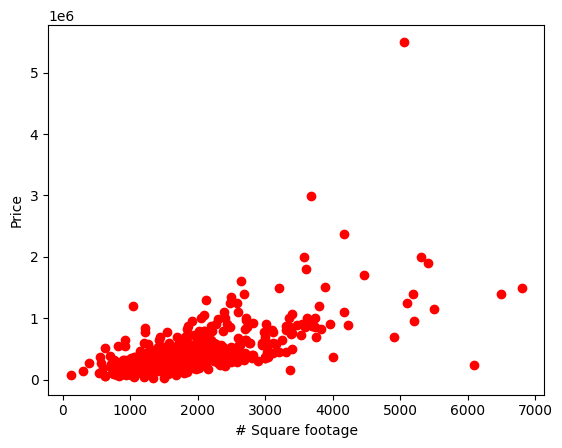

In [10]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [11]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

In [15]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

# Number of epochs
MAX_EPOCHS = 2000

mse_val = []                       
# Loop
for itr in range (0, MAX_EPOCHS):
    X_train = X_train.reshape(781,1)
    y_train = y_train.reshape(781,1)
  
    y_hat = np.add(np.multiply(X_train, w1), w0)
    
    dw0 = np.multiply(np.sum(y_hat - y_train),(1/len(y)))
    dw1 = np.multiply(np.sum((y_hat - y_train)*X_train),(1/len(y)))

    w0 = w0 - (nu * dw0)
    w1 = w1 - (nu * dw1)
    
    mse = np.sum(np.square(y_hat - y_train))*(1/(2*len(y)))
    mse_val.append(mse)


In [28]:
w = np.array([w0,w1])
print(w)
print()
print("MSE Samples:")
print(mse_val[0],mse_val[1])

[[257032.99535752]
 [535468.30618548]]

MSE Sample:
134306071511.96738 132695748987.17857


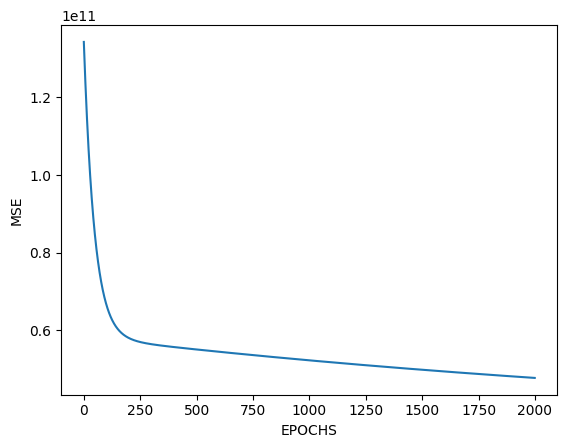

In [30]:
### Plot MSE vs iterations
plt.plot(mse_val)  #
plt.xlabel("EPOCHS")
plt.ylabel("MSE")
plt.show()

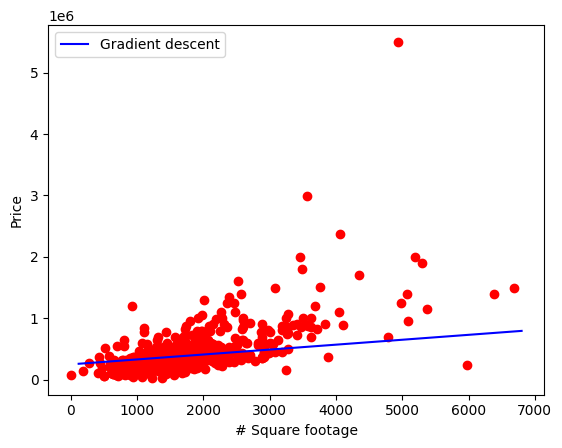

[[257032.99535752]
 [535468.30618548]]


In [31]:
### Plot fitted curve
ycap = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, ycap, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()
print(w)

In [32]:
size = 5000
normalized_size = (size-Xmin) / max_min
print(w[0] + (w[1] * normalized_size))

[648213.4346068]
